<a href="https://colab.research.google.com/github/AhmedElawady74/6-project-for-ML/blob/main/6_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Про реальные данные

In [ ]:
# Скачать библиотеки, которых у меня нет
!pip install graphviz
!pip install --upgrade scikit-learn

In [ ]:
# Все библиотеки необходимые для задачи
import pandas as pd  # Импорт библиотеки pandas для работы с данными
import numpy as np  # Импорт библиотеки numpy для работы с массивами
import seaborn as sns  # Импорт библиотеки seaborn для визуализации данных
import matplotlib.pyplot as plt  # Импорт библиотеки matplotlib для построения графиков
from sklearn.model_selection import train_test_split  # Импорт функции train_test_split для разделения данных на обучающие и тестовые
from sklearn.pipeline import make_pipeline  # Импорт функции make_pipeline для создания конвейера (pipeline)
from sklearn.decomposition import PCA  # Импорт метода PCA для уменьшения размерности данных
from sklearn.model_selection import GridSearchCV  # Импорт функции GridSearchCV для подбора параметров модели
from sklearn.linear_model import LinearRegression  # Импорт модели линейной регрессии
from sklearn.metrics import mean_squared_error  # Импорт метрики среднеквадратичной ошибки
from sklearn.compose import ColumnTransformer  # Импорт класса ColumnTransformer для преобразования данных
# Импорт методов PolynomialFeatures, StandardScaler и OneHotEncoder для предобработки данных
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

In [ ]:
# Чтение данных
file_path = '/content/cars_moldova.csv'
df = pd.read_csv(file_path)

In [ ]:
# Отображение столбцов и метаданных
print(df.head())

# Первоначальный анализ данных

         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  


In [ ]:
df.columns
#Имена столбцов

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

In [ ]:
# Feature selection
features = df.drop('Price(euro)', axis=1)  # Selecting features excluding the target
target = df['Price(euro)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining numeric and categorical columns
numeric_columns = ['Year', 'Distance', 'Engine_capacity(cm3)']
categorical_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

# Defining Transformers for each type of column
numeric_transformer = make_pipeline(PolynomialFeatures(), StandardScaler(), PCA())
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Defining ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Redefining the model pipeline using ColumnTransformer
model_pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Training the model on the data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polynomialfeatures',
                                                                   PolynomialFeatures()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type',
                                                   'Transmission'])])),
                ('linearregression', LinearRegression())])

Запустив этот код, мы выполнили следующее:

- Feature Selection: мы выбрали функции из набора данных, исключая целевую переменную («Цена (евро)»).
- Data Splitting: мы разделили данные на обучающие и тестовые наборы.
- Column Selection: мы определили числовые и категориальные столбцы.
- Data Transformation: мы определили преобразователи для числовых и категориальных столбцов.
- Column Transformation: мы использовали ColumnTransformer, чтобы применить указанные преобразования к соответствующим столбцам.
- Model Definition: после применения преобразований мы создали конвейер модели, используя LinearReгрессию.
- Model Training: мы обучили модель, используя данные обучения.

> Важность этого кода заключается в подготовке и обучении модели машинного обучения, где разработка функций и преобразование имеют решающее значение для производительности модели. Выбранная модель представляет собой модель линейной регрессии, и обучение выполняется по указанным признакам и целевой переменной. Этот процесс является фундаментальным шагом в построении прогнозной модели.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pack

Best model options: {'columntransformer__num__pca__n_components': 7, 'columntransformer__num__polynomialfeatures__degree': 2}


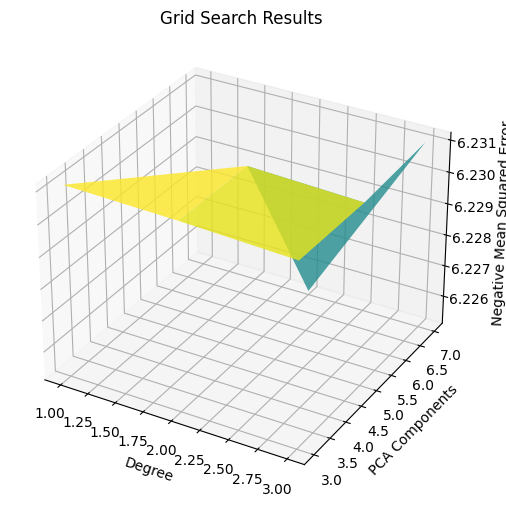

In [ ]:
# Specifying the variables to be tuned
param_grid = {
    'columntransformer__num__polynomialfeatures__degree': [1, 2, 3],
    'columntransformer__num__pca__n_components': [3, 5, 7],
}

# Setting up GridSearchCV using Pipeline
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Training the model using the training data
grid_search.fit(X_train, y_train)

# Displaying the best model parameters
best_params = grid_search.best_params_
print("Best model options:", best_params)

# Plotting the results
degrees = [1, 2, 3]
components = [3, 5, 7]

# Using meshgrid to plot the surface
degree_mesh, components_mesh = np.meshgrid(degrees, components)
mse_values = -grid_search.cv_results_['mean_test_score'].reshape(len(components), len(degrees))

# Plotting the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(degree_mesh, components_mesh, mse_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Degree')
ax.set_ylabel('PCA Components')
ax.set_zlabel('Negative Mean Squared Error')
ax.set_title('Grid Search Results')
plt.show()

Наблюдения:

- Этот код выполняет поиск по сетке для настройки гиперпараметров, используя указанную сетку параметров.
- Отображаются лучшие параметры модели.
- Код генерирует трехмерный график поверхности для визуализации результатов поиска по сетке, где ось x представляет степень, ось y представляет компоненты PCA, а ось z представляет отрицательную среднеквадратическую ошибку. График помогает понять, как различные комбинации гиперпараметров влияют на производительность модели.

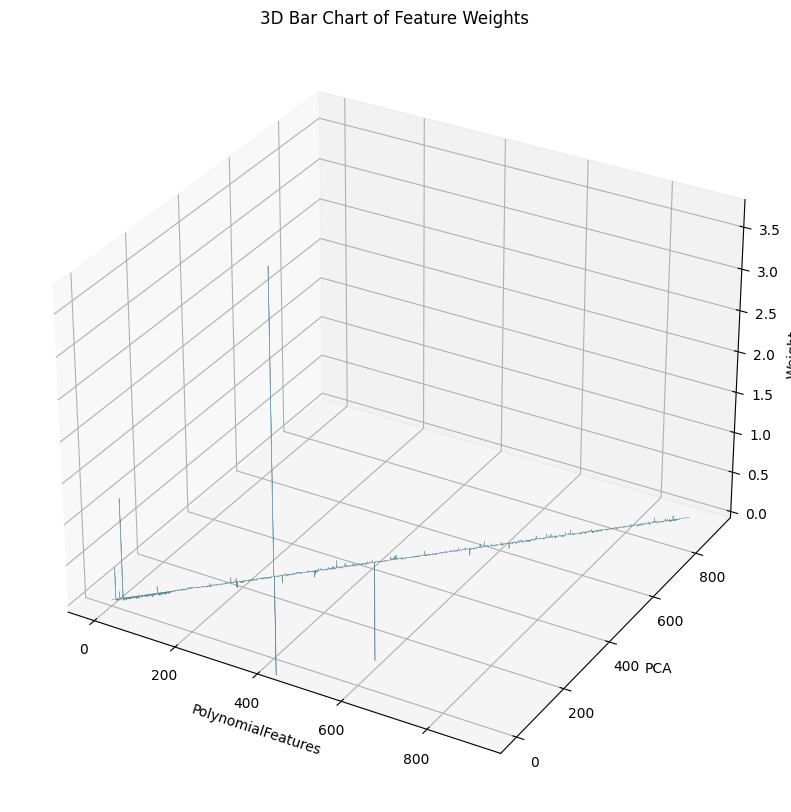

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Specify the type of plot (three-dimensional)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up the data
x = results_df.index  # PolynomialFeatures variables
y = results_df.index  # PCA variables
z = results_df['Weight']  # Weight

# Plot the data
ax.bar3d(x, y, np.zeros_like(z), 1, 1, z, shade=True, color='skyblue')

# Improve axis labels
ax.set_xlabel('PolynomialFeatures')
ax.set_ylabel('PCA')
ax.set_zlabel('Weight')
ax.set_title('3D Bar Chart of Feature Weights')

plt.show()

Наблюдения:

- Этот код создает трехмерную гистограмму для визуализации весов различных функций модели.
- Ось X представляет переменные PolynomialFeatures, ось Y представляет переменные PCA, а ось Z представляет вес каждого объекта.
- Код помогает понять относительную важность различных функций модели.
- Полученная трехмерная гистограмма обеспечивает визуальное представление того, как веса варьируются в зависимости от переменных PolynomialFeatures и PCA. Это позволяет быстро сравнить важность функций в трехмерном пространстве.

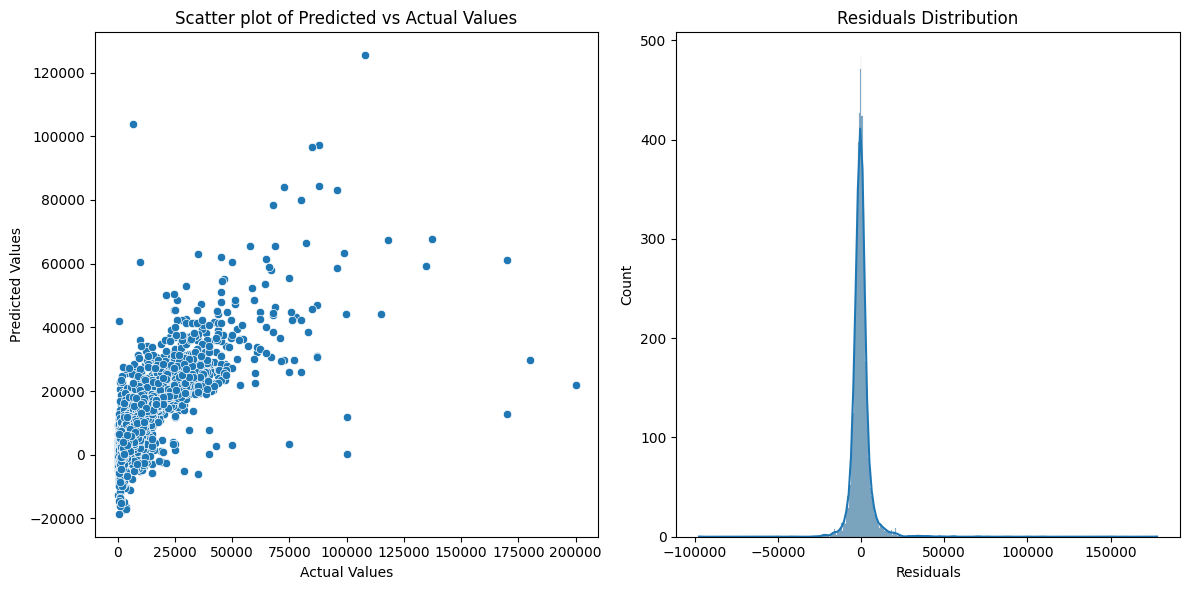

Performance Metric: 45091617.78414393

Conclusion:
Модель линейной регрессии с преобразованием данных была успешно использована.
Мы можем улучшить производительность модели, настроив больше переменных.


In [ ]:
# Model Performance Evaluation on Test Data
y_pred = best_model.predict(X_test)

# Calculate the performance metric (can be changed depending on the data type)
performance_metric = mean_squared_error(y_test, y_pred)

# Display some predictive results and actual values in a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Scatter plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Print the performance metric
print(f'Performance Metric: {performance_metric}')

# Conclusion
print('\nConclusion:')
print('Модель линейной регрессии с преобразованием данных была успешно использована.')
print('Мы можем улучшить производительность модели, настроив больше переменных.')

Наблюдения:

- Этот код оценивает производительность модели линейной регрессии на тестовых данных.
- Диаграмма рассеяния визуально сравнивает прогнозируемые значения с фактическими значениями, предоставляя представление о точности прогнозирования модели.
- График распределения остатков помогает понять распределение ошибок в прогнозах.
- Показатель производительности (среднеквадратическая ошибка) распечатывается для количественной оценки точности модели.
> Вывод позволяет предположить, что модель линейной регрессии с преобразованием данных оказалась успешной и существует потенциал для дальнейшего улучшения за счет корректировки дополнительных переменных.